# Environmental Impact Evaluation of Concrete Frame Bridges

This notebook takes the parameter vectors x as input and calculates first the volumes and the environmental impacts of all the structures.

In [1]:
import pickle
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import math as m

In [2]:
idx_s=200


# Import CFM_xy data
xy_file_name='CFBData\\{}_Batch\\{}_CFB_xy.csv'.format(idx_s,idx_s)

df_xy=pd.read_csv(xy_file_name)
df_xy

,Unnamed: 0,ID,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,s_plate,...,y_s,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c
0,0,1,5361.115418,17451.415474,744.304389,275.279703,3820.154356,17.838816,12.481430,218.545430,...,4987.521973,-2517.141846,eta_1_x,0.0,5.430790,173.859085,98.314178,-4067.336670,eta_3_bot,0.0
1,1,2,7197.928187,12610.611102,792.070735,496.244565,4273.476243,22.587214,26.028824,128.850732,...,6500.823242,-1904.297729,eta_4_x,0.0,18.270001,293.142883,6500.823242,-1090.091309,eta_3_bot,0.0
2,2,3,4946.728918,16364.414176,373.131286,477.965439,3363.099660,24.607351,29.281128,135.563137,...,2073.840576,-326.489868,eta_2_y,0.0,13.517034,3468.395752,2073.840576,-326.489868,eta_3_top,0.0
3,3,4,4940.337104,19145.252592,464.963852,412.443855,2135.646626,15.313616,16.445258,79.214303,...,1656.870605,-425.109802,eta_1_x,0.0,17.884413,3381.489746,2101.281494,-425.109802,eta_3_top,0.0
4,4,5,5001.251491,15433.006671,222.105558,309.910967,3399.889667,12.231035,28.075810,208.025337,...,2499.154785,-175.346497,eta_1_x,0.0,3.171281,4590.812500,2499.154785,-175.346497,eta_3_top,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,995,3281.367780,15498.452667,577.306324,421.458974,4699.266956,29.736156,27.057742,93.172957,...,163.900711,-2296.886475,eta_1_x,0.0,6.351162,1829.632202,163.900711,-4665.050781,eta_3_bot,0.0
995,995,996,3666.643637,15455.753526,792.299652,471.784421,4931.536191,10.685627,14.709277,194.274833,...,2363.356445,-739.479675,eta_3_y,0.0,11.660351,4830.938477,200.508377,-5082.087891,eta_3_bot,0.0
996,996,997,6184.735919,11369.136905,645.636004,245.825059,3643.241327,28.115256,14.995675,101.134360,...,76.088707,-4161.842285,eta_4_x,0.0,9.986733,11232.991211,76.088707,-4161.842285,eta_3_bot,0.0
997,997,998,7491.926992,9743.524453,776.691431,387.895813,2073.204456,22.060343,17.066350,144.671295,...,6957.100586,-921.270569,eta_4_x,0.0,11.777114,8872.617188,6957.100586,-1316.269409,eta_3_bot,0.0


In [63]:
df_xy['d4_walls']

0     24
1     24
2     24
3     24
4     24
5     24
6     24
7     24
8     24
9     24
10    24
11    24
12    24
13    24
14    24
15    24
16    24
17    24
18    24
19    24
Name: d4_walls, dtype: int64

In [64]:
# start_ID=0
# end_ID=19
# ID=1

##### Calculate Volumes of Deck Slab of concrete and steel
#volume of Concrete
vol_plate_conc=df_xy['t_p']/1000 * df_xy['L']/1000 * (df_xy['b1'] + df_xy['b2'])/2/1000 #[m3]

#volume of Reinforcement
As_1=((df_xy['d1_plate']/1000)**2)*m.pi/4
n_1=((df_xy['b1']+df_xy['b2'])/2)/df_xy['s_plate']

As_4=((df_xy['d4_plate']/1000)**2)*m.pi/4
n_4=((df_xy['b1']+df_xy['b2'])/2)/df_xy['s_plate']

As_2=((df_xy['d2_plate']/1000)**2)*m.pi/4
n_2=df_xy['L']/df_xy['s_plate']

As_3=((df_xy['d3_plate']/1000)**2)*m.pi/4
n_3=df_xy['L']/df_xy['s_plate']

vol_plate_steel = (As_1*n_1 + As_4*n_4)*df_xy['L']/1000  +  (As_2*n_2+As_3*n_3) * ((df_xy['b1']+df_xy['b2'])/2)/1000 #[m3]
w_plate_steel = vol_plate_steel* 7850   #[kg]      #Unit weight of steel is taken as 7850 kg/m3



##### Calculate Volumes of both walls of concrete and steel
#volume of Concrete
vol_walls_conc=df_xy['t_w']/1000 * df_xy['h_w']/1000 *  (df_xy['b1']+df_xy['b2'])/1000     #[m3]



#volume of Reinforcement
As_1=((df_xy['d1_walls']/1000)**2)*m.pi/4
n_1=((df_xy['b1']+df_xy['b2'])/2)/df_xy['s_walls']

As_4=((df_xy['d4_walls']/1000)**2)*m.pi/4
n_4=((df_xy['b1']+df_xy['b2'])/2)/df_xy['s_walls']

As_2=((df_xy['d2_walls']/1000)**2)*m.pi/4
n_2=df_xy['L']/df_xy['s_walls']

As_3=((df_xy['d3_walls']/1000)**2)*m.pi/4
n_3=df_xy['L']/df_xy['s_walls']

vol_walls_steel = ((As_1*n_1 + As_4*n_4)*df_xy['h_w']/1000)*2  +  (As_2*n_2 + As_3*n_3) * (df_xy['b1']+df_xy['b2'])/1000 #[m3]
w_walls_steel = vol_walls_steel* 7850   #[kg]      #Unit weight of steel is taken as 7850 kg/m3


matQuantity_dict={'vol_plate_conc':vol_plate_conc, 'vol_plate_steel':vol_plate_steel,'w_plate_steel':w_plate_steel,
                    'vol_wals_conc':vol_walls_conc, 'vol_wall_steel':vol_walls_steel, 'w_wall_steel':w_walls_steel }

df_matQ=pd.DataFrame(matQuantity_dict)

df_matQ


,vol_plate_conc,vol_plate_steel,w_plate_steel,vol_wals_conc,vol_wall_steel,w_wall_steel
0,7.776000,0.109931,862.955290,20.06208,0.196025,1538.793107
1,11.050105,0.156217,1226.304885,20.06208,0.214539,1684.132945
2,14.324211,0.202504,1589.654481,20.06208,0.233054,1829.472784
3,17.598316,0.248790,1953.004076,20.06208,0.251568,1974.812622
4,20.872421,0.295077,2316.353672,20.06208,0.270083,2120.152460
5,24.146526,0.341363,2679.703268,20.06208,0.288598,2265.492298
6,27.420632,0.387650,3043.052863,20.06208,0.307112,2410.832137
7,30.694737,0.433937,3406.402459,20.06208,0.325627,2556.171975
8,33.968842,0.480223,3769.752054,20.06208,0.344142,2701.511813
9,37.242947,0.526510,4133.101650,20.06208,0.362656,2846.851651


In [65]:
### define environmental impact factors of my material

materials_concrete = {  'C30/37_average': {'Description': 'Durchschnittliche Zusammensetzungen für Beton in Deutschland (compression strength of 30 MPa) vom InformationsZentrum Beton GmbH',
                                         'EpdLink': 'https://www.oekobaudat.de/OEKOBAU.DAT/resource/sources/dc600cd9-9a55-414e-baf5-f36c54269803/Beton_der_Druckfestigkeitsklasse_C_3037_10616.pdf?version=00.02.000',
                                          'AP': 0.3431,
                                          'GWP': 218.71,
                                          'APD-fossil': 1043.1 ,
                                          'ADP-minerals-metals': 0.000705978,
                                          'ODP': 0.000000059584079,
                                          'POCP': 0.016064, 
                                         },
                 
                        'C45/55_average': {'Description': 'durchschnittliche Zusammensetzungen für Beton in Deutschland (compression strength of 30 MPa) vom InformationsZentrum Beton GmbH',
                                         'EpdLink': 'https://www.oekobaudat.de/OEKOBAU.DAT/resource/sources/ef01ced5-dd04-43b8-80ce-5a5a7c421657/Beton_der_Druckfestigkeitsklasse_C_4555.pdf?version=00.01.000',
                                          'AP': 0.4321,
                                          'GWP': 285.71 ,
                                          'APD-fossil': 1406.1 ,
                                          'ADP-minerals-metals': 0.001014978,
                                          'ODP': 0.000000077084079,
                                          'POCP': 0.025364, 
                                         },

                        'C50/60_average': {'Description': 'durchschnittliche Zusammensetzungen für Beton in Deutschland (compression strength of 30 MPa) vom InformationsZentrum Beton GmbH',
                                         'EpdLink': 'https://www.oekobaudat.de/OEKOBAU.DAT/resource/sources/892ca341-33e1-4136-81b9-ccd8418e9d73/Beton_der_Druckfestigkeitsklasse_C_5060_10526.pdf?version=00.03.000',
                                          'AP': 0.4481,
                                          'GWP': 299.71,
                                          'APD-fossil': 1406.1 ,
                                          'ADP-minerals-metals': 0.001064978,
                                          'ODP': 0.000000083884079,
                                          'POCP': 0.028164, 
                                         }
                        }


materials_concrete = {  'Rebar Stahl Gerlafingen': {'Description': 'Rebar produced at Gerlafingen (Switzerland) B500B',
                                         'EpdLink': 'https://gruppobeltrame.com/wp-content/uploads/2021/02/EPD_Rebar-TOPAR-RC-rev1.pdf',
                                          'AP': 0.0009637,
                                          'GWP': 0.25054,
                                          'APD-fossil': 9.8661,
                                          'ADP-minerals-metals': -0.0000015945439,
                                          'ODP': 0.000000037507,
                                          'POCP': 0.00078423, 
                                         }
                        }

In [68]:
df_xy['fcc']

0     12.8
1     12.8
2     12.8
3     12.8
4     12.8
5     12.8
6     12.8
7     12.8
8     12.8
9     12.8
10    12.8
11    12.8
12    12.8
13    12.8
14    12.8
15    12.8
16    12.8
17    12.8
18    12.8
19    12.8
Name: fcc, dtype: float64

In [ ]:
### evaluate environmental impact indicators


gwp = df_matQ*


In [5]:
# NEW: Eingabe
idx_s0=520
start_id = 0
end_id = 19
step='step_4'
var_par='t_p'
unit=' [mm]'

df_xy_0=None

#current_directory = os.getcwd()

xy_file_name='CFBData\\{}_Batch\\{}_CFB_xy.csv'.format(idx_s0,idx_s0)

df_xy_0=pd.read_csv(xy_file_name)
df_xy_0[[var_par,'eta_min_s','x_s','y_s','z_s','Location_s','GP_count_s','eta_min_c','x_c','y_c','z_c','Location_c','GP_count_c']]

,t_p,eta_min_s,x_s,y_s,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c
0,200.000000,1.807092,1490.825684,125.526970,-152.941177,eta_4_x,0,0.849370,1490.825684,125.526970,-152.941177,eta_3_bot,39
1,252.631579,1.844103,1418.609131,125.526970,-206.698563,eta_4_x,0,1.501477,1418.609131,125.526970,-206.698563,eta_3_bot,0
2,305.263158,2.634493,169.461411,2876.669189,-258.299591,eta_1_x,0,2.183600,632.438599,2523.330811,-258.299591,eta_3_top,0
3,357.894737,3.068654,225.948547,1975.996216,-310.175446,eta_1_x,0,2.722175,225.948547,1975.996216,-310.175446,eta_3_top,0
4,410.526316,3.609217,225.948547,1975.996216,-362.229095,eta_1_x,0,3.457207,225.948547,1975.996216,-362.229095,eta_3_top,0
5,463.157895,4.105463,225.948547,1975.996216,-408.668732,eta_1_x,0,3.958764,225.948547,152.941177,-1134.635986,eta_3_bot,0
6,515.789474,4.761622,225.948547,2506.003662,-470.278625,eta_1_x,0,4.459806,225.948547,152.941177,-1187.266968,eta_3_bot,0
7,568.421053,5.254798,225.948547,1975.996216,-518.266235,eta_1_x,0,4.892789,225.948547,152.941177,-1239.899048,eta_3_bot,0
8,621.052632,5.818065,225.948547,2506.003662,-566.253845,eta_1_x,0,5.290814,225.948547,5247.058594,-800.974976,eta_3_bot,0
9,673.684211,6.391922,225.948547,1975.996216,-614.241516,eta_1_x,0,5.745561,225.948547,5247.058594,-1345.161987,eta_3_bot,0


In [23]:
# NEW: Eingabe
idx_s1=540
start_id = 0
end_id = 19
step='step_4'
var_par='L'
unit=' [mm]'

df_xy_1=None

#current_directory = os.getcwd()

xy_file_name='CFBData\\{}_Batch\\{}_CFB_xy.csv'.format(idx_s1,idx_s1)

df_xy_1=pd.read_csv(xy_file_name)
df_xy_1[[var_par,'eta_min_s','x_s','y_s','z_s','Location_s','GP_count_s','eta_min_c','x_c','y_c','z_c','Location_c','GP_count_c']]

,L,eta_min_s,x_s,y_s,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c
0,2000.000000,24.739957,9487.204102,152.941177,-1943.225830,eta_1_x,0.0,17.977324,225.948547,152.941177,-2800.078125,eta_3_bot,0.0
1,2842.105263,30.004125,9487.204102,152.941177,-1943.225830,eta_1_x,0.0,22.001939,225.948547,152.941177,-2800.078125,eta_3_bot,0.0
2,3684.210526,13.795115,225.948547,1964.448853,-352.941162,eta_1_x,0.0,12.829160,843.251465,1319.761108,-352.941162,eta_3_top,0.0
3,4526.315789,6.492379,225.948547,1509.922852,-352.941162,eta_1_x,0.0,6.019617,225.948547,1509.922852,-352.941162,eta_3_top,0.0
4,5368.421053,4.235659,225.948547,1818.070801,-352.941162,eta_1_x,0.0,4.009384,225.948547,1818.070801,-352.941162,eta_3_top,0.0
5,6210.526316,2.991426,225.948547,2126.218262,-352.941162,eta_1_x,0.0,2.810796,225.948547,2126.218262,-352.941162,eta_3_top,0.0
6,7052.631579,2.411180,225.948547,2434.365479,-352.941162,eta_1_x,0.0,2.287296,225.948547,2434.365479,-352.941162,eta_3_top,0.0
7,7894.736842,2.436642,225.948547,3992.570068,-352.941162,eta_1_x,0.0,2.272734,225.948547,3502.166992,-352.941162,eta_3_top,0.0
8,8736.842105,2.071725,225.948547,723.256897,-352.941162,eta_4_x,0.0,1.919213,225.948547,152.941177,-1071.478027,eta_3_bot,0.0
9,9578.947368,1.823774,225.948547,796.312683,-352.941162,eta_4_x,0.0,1.427387,225.948547,4889.776855,-352.941162,eta_3_top,0.0


In [47]:
# NEW: Eingabe
idx_s2=541
start_id = 0
end_id = 19
step='step_4'
var_par='L'
unit=' [mm]'

df_xy_2=None

#current_directory = os.getcwd()

xy_file_name='CFBData\\{}_Batch\\{}_CFB_xy.csv'.format(idx_s2,idx_s2)

df_xy_2=pd.read_csv(xy_file_name)
df_xy_2[[var_par,'eta_min_s','x_s','y_s','z_s','Location_s','GP_count_s','eta_min_c','x_c','y_c','z_c','Location_c','GP_count_c']]

,L,eta_min_s,x_s,y_s,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c
0,2000.000000,14.233045,993.883789,152.941177,-2920.026123,eta_4_x,0.0,9.716667,75.316185,152.941177,-2920.026123,eta_3_bot,0.0
1,2842.105263,14.952193,1500.916138,2230.242432,-352.941162,eta_4_x,0.0,11.405292,75.316185,152.941177,-2920.026123,eta_3_bot,0.0
2,3684.210526,10.304128,1500.916138,2999.291016,-352.941162,eta_4_x,0.0,9.873904,1500.916138,1749.553589,-352.941162,eta_3_top,0.0
3,4526.315789,6.687820,993.883789,4054.376465,-352.941162,eta_4_x,0.0,6.759114,1500.916138,1989.038574,-352.941162,eta_3_top,0.0
4,5368.421053,4.385847,637.483826,258.619202,-352.941162,eta_4_x,0.0,4.004254,431.716187,152.941177,-623.825989,eta_3_bot,0.0
5,6210.526316,3.207024,75.316185,302.452972,-352.941162,eta_4_x,0.0,2.909266,281.083832,152.941177,-623.825989,eta_3_bot,0.0
6,7052.631579,2.267745,75.316185,288.572296,-352.941162,eta_4_x,0.0,2.122680,75.316185,152.941177,-623.825989,eta_3_bot,0.0
7,7894.736842,1.839873,75.316185,278.657074,-352.941162,eta_4_x,0.0,1.731493,281.083832,152.941177,-623.825989,eta_3_bot,0.0
8,8736.842105,1.802877,75.316185,309.967468,-352.941162,eta_4_x,0.0,1.252344,75.316185,83.055534,-352.941162,eta_3_bot,0.0
9,9578.947368,1.773318,75.316185,298.617645,-352.941162,eta_4_x,0.0,0.763618,75.316185,298.617645,-352.941162,eta_3_bot,46.0


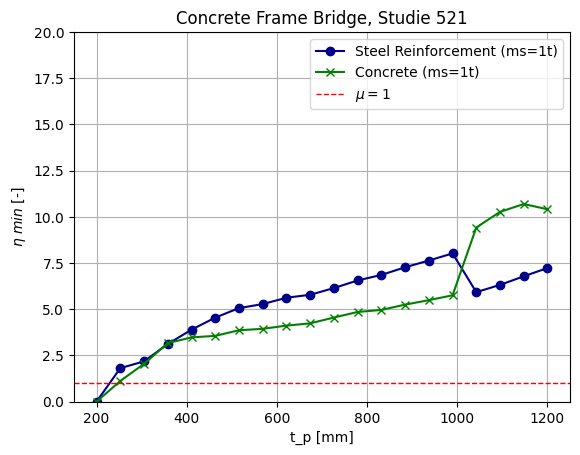

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(df_xy_2[var_par], df_xy_2['eta_min_s'],label='Steel Reinforcement (ms=1t)', marker='o', color='darkblue')
ax.plot(df_xy_2[var_par], df_xy_2['eta_min_c'], label='Concrete (ms=1t)', marker='x', color='green')

ax.set(xlabel=var_par+unit, ylabel='$\eta \ min$ [-]',
       title='Concrete Frame Bridge, Studie {}'.format(idx_s2))

ax.set_ylim(bottom=0,top=20)
ax.axhline(y=1, color='red', linestyle='--', linewidth=1, label='$\mu=1$')

ax.grid()
ax.legend()

#fig.savefig("test.png")
# plt.show()

In [26]:
# save figure
figname='eta_plot_var_{}'.format(var_par)
fig_folder_path='CFBData\\{}_Batch\\_figures'.format(idx_s2)
create_folder_if_not_exists(fig_folder_path)
fig.savefig(fig_folder_path+"\\"+figname+".png")

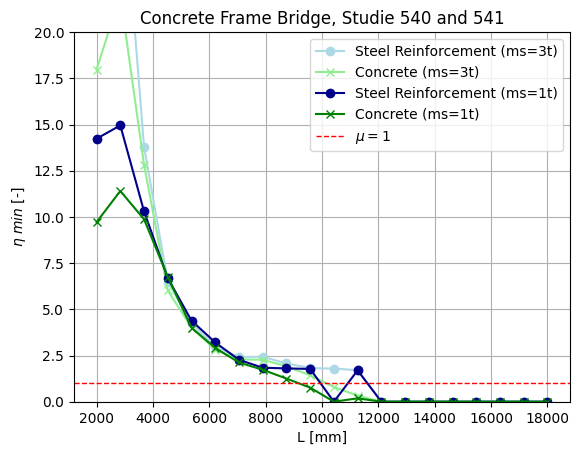

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df_xy_1[var_par], df_xy_1['eta_min_s'],label='Steel Reinforcement (ms=3t)', marker='o', color='lightblue')
ax.plot(df_xy_1[var_par], df_xy_1['eta_min_c'], label='Concrete (ms=3t)', marker='x', color='lightgreen')

ax.plot(df_xy_2[var_par], df_xy_2['eta_min_s'],label='Steel Reinforcement (ms=1t)', marker='o', color='darkblue')
ax.plot(df_xy_2[var_par], df_xy_2['eta_min_c'], label='Concrete (ms=1t)', marker='x', color='green')

ax.set(xlabel=var_par+unit, ylabel='$\eta \ min$ [-]',
       title='Concrete Frame Bridge, Studie {} and {}'.format(idx_s1,idx_s2))

ax.set_ylim(bottom=0,top=20)
ax.axhline(y=1, color='red', linestyle='--', linewidth=1, label='$\mu=1$')

ax.grid()
ax.legend()

#fig.savefig("test.png")
# plt.show()

In [28]:
# save figure
figname='eta_plot_var_{}_{}vs{}'.format(var_par,idx_s1,idx_s2)
fig_folder_path='CFBData\\{}_Batch\\_figures'.format(idx_s2)
create_folder_if_not_exists(fig_folder_path)
fig.savefig(fig_folder_path+"\\"+figname+".png")

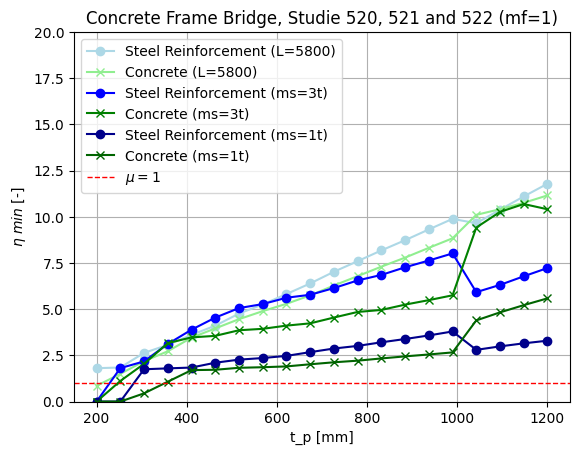

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df_xy_0[var_par], df_xy_0['eta_min_s'],label='Steel Reinforcement (L=5800)', marker='o', color='lightblue')
ax.plot(df_xy_0[var_par], df_xy_0['eta_min_c'], label='Concrete (L=5800)', marker='x', color='lightgreen')

ax.plot(df_xy_1[var_par], df_xy_1['eta_min_s'],label='Steel Reinforcement (ms=3t)', marker='o', color='blue')
ax.plot(df_xy_1[var_par], df_xy_1['eta_min_c'], label='Concrete (ms=3t)', marker='x', color='green')

ax.plot(df_xy_2[var_par], df_xy_2['eta_min_s'],label='Steel Reinforcement (ms=1t)', marker='o', color='darkblue')
ax.plot(df_xy_2[var_par], df_xy_2['eta_min_c'], label='Concrete (ms=1t)', marker='x', color='darkgreen')

ax.set(xlabel=var_par+unit, ylabel='$\eta \ min$ [-]',
       title='Concrete Frame Bridge, Studie {}, {} and {} (mf=1)'.format(idx_s0, idx_s1,idx_s2))

ax.set_ylim(bottom=0,top=20)
ax.axhline(y=1, color='red', linestyle='--', linewidth=1, label='$\mu=1$')

ax.grid()
ax.legend()

#fig.savefig("test.png")
# plt.show()

In [8]:
# save figure
figname='eta_plot_var_{}_{}vs{}vs{}'.format(var_par,idx_s0,idx_s1,idx_s2)
fig_folder_path='CFBData\\{}_Batch\\_figures'.format(idx_s2)
create_folder_if_not_exists(fig_folder_path)
fig.savefig(fig_folder_path+"\\"+figname+".png")

# 3D plot of most critical point

In [48]:
# extract information about the bridge that we need to plot the bridge

ID=2

t_p=df_xy_2['t_p'][ID]
L=df_xy_2['L'][ID]
b=df_xy_2['b1'][ID]
h_w=df_xy_2['h_w'][ID]
h=h_w+t_p

x_s=df_xy_2['x_s'][ID]
y_s=df_xy_2['y_s'][ID]
z_s=df_xy_2['z_s'][ID]
layer=df_xy_2['Location_s'][ID]
eta_s=df_xy_2['eta_min_s'][ID]

x_c=df_xy_2['x_c'][ID]
y_c=df_xy_2['y_c'][ID]
z_c=df_xy_2['z_c'][ID]
location=df_xy_2['Location_c'][ID]
eta_c=df_xy_2['eta_min_c'][ID]

L

3684.210526315789

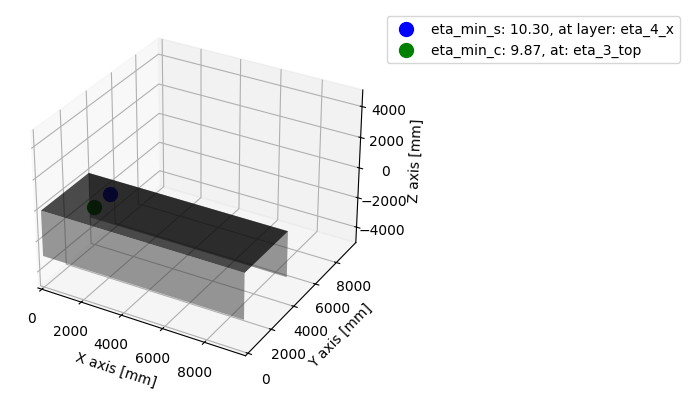

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating a grid of values for plotting
x = np.linspace(0, b, 100)
y = np.linspace(0, L, 100)
x_p, y_p = np.meshgrid(x, y)
z_p = 0*x_p*y_p

z= np.linspace(0, -h, 100)
x_w, z_w = np.meshgrid(x, z)
y_w1=0*x*z
y_w2=L+0*x*z

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the surfaces
ax.plot_surface(x_p, y_p, z_p, alpha=0.7, rstride=100, cstride=100, color='black')
ax.plot_surface(x_w, y_w1, z_w, alpha=0.5, rstride=100, cstride=100, color='gray')
ax.plot_surface(x_w, y_w2, z_w, alpha=0.5, rstride=100, cstride=100, color='gray')



# Plotting the specific point
ax.scatter(x_s, y_s, z_s, color='blue', s=100, label='eta_min_s: {:0.2f}, at layer: {}'.format(eta_s, layer)) 
ax.scatter(x_c, y_c, z_c, color='green', s=100, label='eta_min_c: {:0.2f}, at: {}'.format(eta_c, location)) 

# Setting labels
ax.set_xlabel('X axis [mm]')
ax.set_ylabel('Y axis [mm]')
ax.set_zlabel('Z axis [mm]')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1)) 

# Calculate aspect ratio
max_range = np.array([x_w.max()-x_w.min(), y_p.max()-y_p.min(), z_w.max()-z_w.min()]).max()


ax.set_xlim(0,max_range)
ax.set_ylim(0,max_range)
ax.set_zlim(-max_range/2,max_range/2)

# Show plot
plt.show()